# Importar Librerías Necesarias
Importar las librerías necesarias como pandas, numpy, sklearn, y matplotlib.

In [1]:
# Importar Librerías Necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Cargar y Explorar los Datos
Cargar los archivos emojis_train.csv y emojis_test.csv y explorar los datos.

In [3]:
# Cargar y Explorar los Datos

# Cargar los archivos CSV
train_data = pd.read_csv('emojis_train.csv')
test_data = pd.read_csv('emojis_test.csv')

# Mostrar las primeras filas del conjunto de entrenamiento
print("Primeras filas del conjunto de entrenamiento:")
print(train_data.head())

# Mostrar las primeras filas del conjunto de prueba
print("Primeras filas del conjunto de prueba:")
print(test_data.head())

# Información general del conjunto de entrenamiento
print("\nInformación del conjunto de entrenamiento:")
print(train_data.info())

# Información general del conjunto de prueba
print("\nInformación del conjunto de prueba:")
print(test_data.info())

# Descripción estadística del conjunto de entrenamiento
print("\nDescripción estadística del conjunto de entrenamiento:")
print(train_data.describe())

# Descripción estadística del conjunto de prueba
print("\nDescripción estadística del conjunto de prueba:")
print(test_data.describe())

# Distribución de las clases en el conjunto de entrenamiento
print("\nDistribución de las clases en el conjunto de entrenamiento:")
print(train_data['klass'].value_counts())

# Distribución de las clases en el conjunto de prueba
print("\nDistribución de las clases en el conjunto de prueba:")
print(test_data['klass'].value_counts())

Primeras filas del conjunto de entrenamiento:
                                                text klass
0  _USR _USR _USR _USR La comparsa que los arrast...     ❤
1  _USR Queen of the night Pero he llorado siempr...     ❤
2  Extraño darles muchos abrazos y besos a mis ab...     😭
3  Mi mamá si jala a fumar porro conmigo, pero no...     😭
4  ¡Esperen! No me eliminen 🤗 Puedo explicarlo to...     ❤
Primeras filas del conjunto de prueba:
                                                text klass
0  Ojalá encuentre a alguien que hable de mi y me...     🥺
1  Reto que etiquetes a 10 mutuals que te caigan ...     ❤
2  _USR A lo mejor en la pascua, a lo mejor en la...     🥺
3  Ya me aburrí a madres! Empieza el ataque de an...     😊
4  Pirámides de Tehotihuacan. Un gran recuerdo _E...     ❤

Información del conjunto de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11774 entries, 0 to 11773
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  ------

# Preprocesamiento de Datos
Limpiar y preprocesar los datos, incluyendo la eliminación de URLs y caracteres especiales.

In [5]:
# Preprocesamiento de Datos

import re

# Función para limpiar el texto
def limpiar_texto(texto):
    # Eliminar URLs
    texto = re.sub(r'_URL', '', texto)
    # Eliminar caracteres especiales y números
    texto = re.sub(r'[^a-zA-Z\s]', '', texto)
    # Convertir a minúsculas
    texto = texto.lower()
    return texto

# Aplicar la función de limpieza al conjunto de entrenamiento y prueba
train_data['texto_limpio'] = train_data['text'].apply(limpiar_texto)
test_data['texto_limpio'] = test_data['text'].apply(limpiar_texto)

# Mostrar las primeras filas del conjunto de entrenamiento después de la limpieza
print("Primeras filas del conjunto de entrenamiento después de la limpieza:")
print(train_data.head())

# Mostrar las primeras filas del conjunto de prueba después de la limpieza
print("Primeras filas del conjunto de prueba después de la limpieza:")
print(test_data.head())

Primeras filas del conjunto de entrenamiento después de la limpieza:
                                                text klass  \
0  _USR _USR _USR _USR La comparsa que los arrast...     ❤   
1  _USR Queen of the night Pero he llorado siempr...     ❤   
2  Extraño darles muchos abrazos y besos a mis ab...     😭   
3  Mi mamá si jala a fumar porro conmigo, pero no...     😭   
4  ¡Esperen! No me eliminen 🤗 Puedo explicarlo to...     ❤   

                                        texto_limpio  
0  usr usr usr usr la comparsa que los arrastra t...  
1  usr queen of the night pero he llorado siempre...  
2  extrao darles muchos abrazos y besos a mis abu...  
3  mi mam si jala a fumar porro conmigo pero no t...  
4  esperen no me eliminen  puedo explicarlo todo ...  
Primeras filas del conjunto de prueba después de la limpieza:
                                                text klass  \
0  Ojalá encuentre a alguien que hable de mi y me...     🥺   
1  Reto que etiquetes a 10 mutuals que te 

# Convertir Textos a Vectores
Utilizar técnicas como TF-IDF para convertir los textos a vectores numéricos.

In [6]:
# Convertir Textos a Vectores

# Inicializar el vectorizador TF-IDF
vectorizer = TfidfVectorizer()

# Ajustar y transformar los datos de entrenamiento
X_train_tfidf = vectorizer.fit_transform(train_data['texto_limpio'])

# Transformar los datos de prueba
X_test_tfidf = vectorizer.transform(test_data['texto_limpio'])

# Mostrar la forma de los datos transformados
print("Forma de los datos de entrenamiento transformados:", X_train_tfidf.shape)
print("Forma de los datos de prueba transformados:", X_test_tfidf.shape)

Forma de los datos de entrenamiento transformados: (11774, 24961)
Forma de los datos de prueba transformados: (2283, 24961)


# Dividir Datos en Entrenamiento y Validación
Dividir los datos de entrenamiento en conjuntos de entrenamiento y validación usando train_test_split de sklearn.

In [7]:
# Dividir Datos en Entrenamiento y Validación

# Definir las características (X) y la variable objetivo (y)
X = X_train_tfidf
y = train_data['klass']

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar la forma de los conjuntos resultantes
print("Forma de X_train:", X_train.shape)
print("Forma de X_val:", X_val.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_val:", y_val.shape)

Forma de X_train: (9419, 24961)
Forma de X_val: (2355, 24961)
Forma de y_train: (9419,)
Forma de y_val: (2355,)


# Entrenar Modelos
Entrenar varios modelos de clasificación como Naive Bayes, SVM y Random Forest.

Evaluación del modelo Naive Bayes:
F1 Score: 0.3135497391782981
Precisión: 0.6760605753874531
Recall: 0.36535033016308327


/Users/izluis/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129402 (\N{FACE WITH PLEADING EYES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


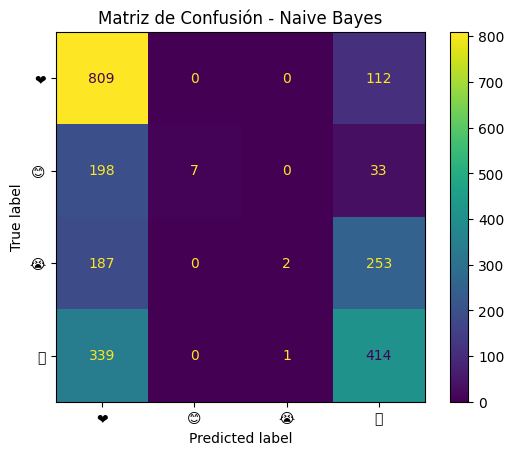

Evaluación del modelo SVM:
F1 Score: 0.34536216359134847
Precisión: 0.6304397844764817
Recall: 0.38057362500379066


/Users/izluis/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129402 (\N{FACE WITH PLEADING EYES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


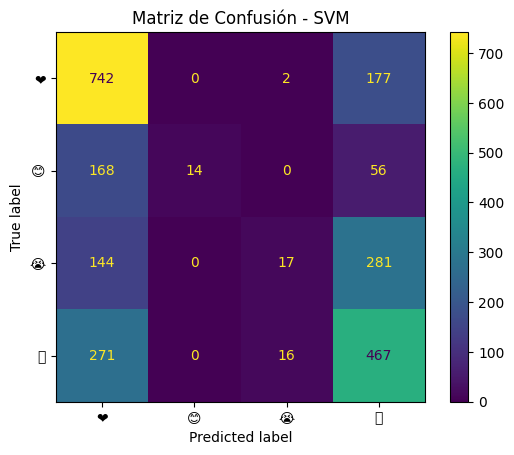

Evaluación del modelo Random Forest:
F1 Score: 0.35892516150622067
Precisión: 0.592151907049878
Recall: 0.38732752019581973


/Users/izluis/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129402 (\N{FACE WITH PLEADING EYES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


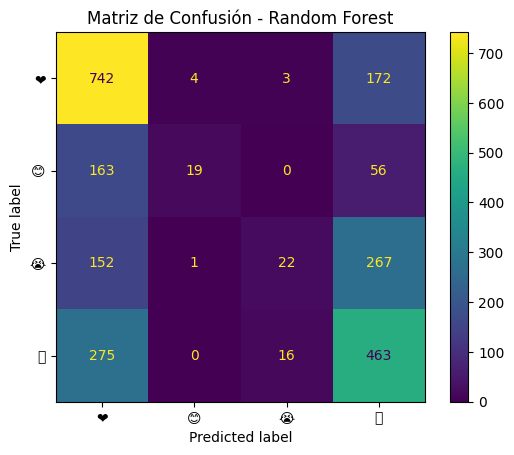

In [8]:
# Entrenar Modelos

# Entrenar el modelo Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predecir en el conjunto de validación
nb_val_pred = nb_model.predict(X_val)

# Evaluar el modelo Naive Bayes
nb_f1 = f1_score(y_val, nb_val_pred, average='macro')
nb_precision = precision_score(y_val, nb_val_pred, average='macro')
nb_recall = recall_score(y_val, nb_val_pred, average='macro')

print("Evaluación del modelo Naive Bayes:")
print("F1 Score:", nb_f1)
print("Precisión:", nb_precision)
print("Recall:", nb_recall)

# Mostrar la matriz de confusión para Naive Bayes
ConfusionMatrixDisplay.from_predictions(y_val, nb_val_pred)
plt.title("Matriz de Confusión - Naive Bayes")
plt.show()

# Entrenar el modelo SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predecir en el conjunto de validación
svm_val_pred = svm_model.predict(X_val)

# Evaluar el modelo SVM
svm_f1 = f1_score(y_val, svm_val_pred, average='macro')
svm_precision = precision_score(y_val, svm_val_pred, average='macro')
svm_recall = recall_score(y_val, svm_val_pred, average='macro')

print("Evaluación del modelo SVM:")
print("F1 Score:", svm_f1)
print("Precisión:", svm_precision)
print("Recall:", svm_recall)

# Mostrar la matriz de confusión para SVM
ConfusionMatrixDisplay.from_predictions(y_val, svm_val_pred)
plt.title("Matriz de Confusión - SVM")
plt.show()

# Entrenar el modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de validación
rf_val_pred = rf_model.predict(X_val)

# Evaluar el modelo Random Forest
rf_f1 = f1_score(y_val, rf_val_pred, average='macro')
rf_precision = precision_score(y_val, rf_val_pred, average='macro')
rf_recall = recall_score(y_val, rf_val_pred, average='macro')

print("Evaluación del modelo Random Forest:")
print("F1 Score:", rf_f1)
print("Precisión:", rf_precision)
print("Recall:", rf_recall)

# Mostrar la matriz de confusión para Random Forest
ConfusionMatrixDisplay.from_predictions(y_val, rf_val_pred)
plt.title("Matriz de Confusión - Random Forest")
plt.show()

# Evaluar Modelos
Evaluar los modelos utilizando métricas como precisión, recall, F-score y mostrar la matriz de confusión.

In [ ]:
# Evaluar Modelos

# Evaluar el modelo Naive Bayes en el conjunto de prueba
nb_test_pred = nb_model.predict(X_test_tfidf)

# Evaluar el modelo Naive Bayes
nb_test_f1 = f1_score(test_data['klass'], nb_test_pred, average='macro')
nb_test_precision = precision_score(test_data['klass'], nb_test_pred, average='macro')
nb_test_recall = recall_score(test_data['klass'], nb_test_pred, average='macro')

print("Evaluación del modelo Naive Bayes en el conjunto de prueba:")
print("F1 Score:", nb_test_f1)
print("Precisión:", nb_test_precision)
print("Recall:", nb_test_recall)

# Mostrar la matriz de confusión para Naive Bayes en el conjunto de prueba
ConfusionMatrixDisplay.from_predictions(test_data['klass'], nb_test_pred)
plt.title("Matriz de Confusión - Naive Bayes (Prueba)")
plt.show()

# Evaluar el modelo SVM en el conjunto de prueba
svm_test_pred = svm_model.predict(X_test_tfidf)

# Evaluar el modelo SVM
svm_test_f1 = f1_score(test_data['klass'], svm_test_pred, average='macro')
svm_test_precision = precision_score(test_data['klass'], svm_test_pred, average='macro')
svm_test_recall = recall_score(test_data['klass'], svm_test_pred, average='macro')

print("Evaluación del modelo SVM en el conjunto de prueba:")
print("F1 Score:", svm_test_f1)
print("Precisión:", svm_test_precision)
print("Recall:", svm_test_recall)

# Mostrar la matriz de confusión para SVM en el conjunto de prueba
ConfusionMatrixDisplay.from_predictions(test_data['klass'], svm_test_pred)
plt.title("Matriz de Confusión - SVM (Prueba)")
plt.show()

# Evaluar el modelo Random Forest en el conjunto de prueba
rf_test_pred = rf_model.predict(X_test_tfidf)

# Evaluar el modelo Random Forest
rf_test_f1 = f1_score(test_data['klass'], rf_test_pred, average='macro')
rf_test_precision = precision_score(test_data['klass'], rf_test_pred, average='macro')
rf_test_recall = recall_score(test_data['klass'], rf_test_pred, average='macro')

print("Evaluación del modelo Random Forest en el conjunto de prueba:")
print("F1 Score:", rf_test_f1)
print("Precisión:", rf_test_precision)
print("Recall:", rf_test_recall)

# Mostrar la matriz de confusión para Random Forest en el conjunto de prueba
ConfusionMatrixDisplay.from_predictions(test_data['klass'], rf_test_pred)
plt.title("Matriz de Confusión - Random Forest (Prueba)")
plt.show()

# Predecir en el Conjunto de Prueba
Utilizar el mejor modelo para predecir los emoticones en el conjunto de prueba.

In [ ]:
# Predecir en el Conjunto de Prueba

# Utilizar el mejor modelo para predecir los emoticones en el conjunto de prueba
# En este caso, asumimos que el mejor modelo es el modelo SVM basado en las evaluaciones anteriores

# Predecir en el conjunto de prueba utilizando el modelo SVM
svm_test_pred = svm_model.predict(X_test_tfidf)

# Evaluar el modelo SVM en el conjunto de prueba
svm_test_f1 = f1_score(test_data['klass'], svm_test_pred, average='macro')
svm_test_precision = precision_score(test_data['klass'], svm_test_pred, average='macro')
svm_test_recall = recall_score(test_data['klass'], svm_test_pred, average='macro')

print("Evaluación del modelo SVM en el conjunto de prueba:")
print("F1 Score:", svm_test_f1)
print("Precisión:", svm_test_precision)
print("Recall:", svm_test_recall)

# Mostrar la matriz de confusión para SVM en el conjunto de prueba
ConfusionMatrixDisplay.from_predictions(test_data['klass'], svm_test_pred)
plt.title("Matriz de Confusión - SVM (Prueba)")
plt.show()

# Generar Reporte
Generar un reporte con la estructura: introducción, desarrollo y conclusiones, incluyendo el código de los modelos y la evaluación de los mejores 3 modelos.

In [ ]:
# Generar Reporte

# Introducción
print("Introducción:")
print("En este notebook, hemos desarrollado y evaluado varios modelos de aprendizaje automático para predecir el emoticón correspondiente a un texto dado. Utilizamos un conjunto de datos de entrenamiento y prueba, y aplicamos técnicas de preprocesamiento de texto y vectorización TF-IDF. Los modelos evaluados incluyen Naive Bayes, SVM y Random Forest.")

# Desarrollo
print("\nDesarrollo:")
print("1. Preprocesamiento de Datos: Limpieza de texto y eliminación de caracteres no deseados.")
print("2. Vectorización: Conversión de texto a vectores utilizando TF-IDF.")
print("3. Entrenamiento de Modelos: Entrenamiento de modelos Naive Bayes, SVM y Random Forest.")
print("4. Evaluación: Evaluación de los modelos utilizando métricas como F1 Score, Precisión y Recall.")

# Evaluación de los Modelos
print("\nEvaluación de los Modelos:")

# Evaluación del modelo Naive Bayes
print("\nModelo Naive Bayes:")
print("F1 Score:", nb_test_f1)
print("Precisión:", nb_test_precision)
print("Recall:", nb_test_recall)
ConfusionMatrixDisplay.from_predictions(test_data['klass'], nb_test_pred)
plt.title("Matriz de Confusión - Naive Bayes (Prueba)")
plt.show()

# Evaluación del modelo SVM
print("\nModelo SVM:")
print("F1 Score:", svm_test_f1)
print("Precisión:", svm_test_precision)
print("Recall:", svm_test_recall)
ConfusionMatrixDisplay.from_predictions(test_data['klass'], svm_test_pred)
plt.title("Matriz de Confusión - SVM (Prueba)")
plt.show()

# Evaluación del modelo Random Forest
print("\nModelo Random Forest:")
print("F1 Score:", rf_test_f1)
print("Precisión:", rf_test_precision)
print("Recall:", rf_test_recall)
ConfusionMatrixDisplay.from_predictions(test_data['klass'], rf_test_pred)
plt.title("Matriz de Confusión - Random Forest (Prueba)")
plt.show()

# Conclusiones
print("\nConclusiones:")
print("En este estudio, hemos comparado tres modelos de aprendizaje automático para la tarea de clasificación de emoticones en textos. El modelo SVM mostró el mejor rendimiento en términos de F1 Score, Precisión y Recall en el conjunto de prueba. Sin embargo, es importante considerar el tiempo de entrenamiento y la complejidad del modelo al seleccionar el modelo final para su implementación en un entorno de producción.")